# WeatherPy
----

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"  Now, we know what you may be thinking: _"Duh. It gets hotter..."_  But, if pressed, how would you **prove** it?

# Overall findings

1. As expected, maximum temperatures for 2 July 2020 were skewed higher the closer to the equator you are.  Although, as the northern hemisphere is in summer, temperatures are hotter between the 20 - 40 degrees mark.

2. Latitudes do not materially affect the wind speed or cloudiness, although there was a very slight trend of less wind and clouds the further away from the equator you are.

3. Overall, there was not much correlation between humidity and the latitude except when you are close to the equator (-20 degrees to 20 degrees), you are unlikely to have dry conditions of humidity less than 50%.

NOTE: As I am in Australia - metric has been used


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import scipy.stats as st
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1750)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1750)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

690

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [166]:
#Set the units and base url
units1 = "metric"

url = f"http://api.openweathermap.org/data/2.5/weather?units={units1}&APPID={weather_api_key}"


In [165]:
#print(url)

In [5]:
# set up lists to hold reponse info
city_list = []
lat = []
lon = []
max_temp = []
humidity = []
cloud = []
wind = []
country = []
date = []

In [6]:
# Loop through the list of cities and perform a request for data on each
for city in cities: 
    
    # Create search query, make request and store in json
    weather_response = requests.get(url + "&q=" + city)
    weather_json = weather_response.json()
    weather_json
    # Try to grab the information required if they are available in the OpenWeather API
    try:
        city_lat = weather_json['coord']['lat']
        city_lon = weather_json['coord']['lon']
        max_temp = weather_json['main']['temp_max']
        humidity = weather_json['main']['humidity']
        cloud = weather_json['clouds']["all"]
        wind = weather_json['wind']["speed"]
        country = weather_json['sys']["country"]
        date = weather_json['dt']
        city_list.append({"City_name": city, 
                          "lat": city_lat, 
                          "long": city_lon,
                          "max_temp": max_temp,
                          "humidity": humidity,
                          "cloud": cloud,
                          "wind_speed": wind,
                          "country": country  
})
    
    # Handle exceptions for cities that do not have information
    except:
        print("Not here")
        pass
#Know when the city data gathering has finished!
print("Awesome job you have got the city weather data")

Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Awesome job you have got the city weather data


Note: I forgot to get the city to scroll through with the name etc - the "Not here" is for cities that didn't match the weather api.  And the final message told me that the information was gathered.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Convert data into a dataframe and discover the length
weather_data = pd.DataFrame(city_list)
len(weather_data)

640

In [8]:
#Review data
weather_data.head(20)

,City_name,lat,long,max_temp,humidity,cloud,wind_speed,country
0,bara,10.37,10.73,26.61,70,14,4.76,NG
1,boa vista,2.82,-60.67,29.00,66,20,2.10,BR
2,albany,42.60,-73.97,26.11,65,78,2.24,US
3,hobart,-42.88,147.33,8.33,65,75,6.70,AU
4,rikitea,-23.12,-134.97,21.42,70,0,9.43,PF
5,yumen,40.28,97.20,24.02,19,99,2.98,CN
6,tuatapere,-46.13,167.68,3.89,83,60,1.34,NZ
7,jamestown,42.10,-79.24,26.00,54,1,4.10,US
8,bundaberg,-24.85,152.35,19.00,82,1,3.10,AU
9,kangaatsiaq,68.31,-53.46,5.36,85,0,6.45,GL


In [9]:
#Check the datatypes
weather_data.dtypes

City_name      object
lat           float64
long          float64
max_temp      float64
humidity        int64
cloud           int64
wind_speed    float64
country        object
dtype: object

In [10]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
weather_data.to_csv("weatherdata.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#Show the overall weather_data general statistics
weather_data.describe()

,lat,long,max_temp,humidity,cloud,wind_speed
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,19.690656,24.236312,20.087313,71.604687,45.185938,3.370734
std,33.083707,89.902597,7.844691,20.017949,39.437018,2.333113
min,-54.800000,-179.170000,-2.000000,9.000000,0.000000,0.180000
25%,-6.152500,-56.022500,13.705000,62.000000,2.000000,1.557500
50%,22.810000,26.295000,21.935000,76.000000,40.000000,2.690000
75%,46.190000,108.245000,26.012500,87.000000,90.000000,4.470000
max,78.220000,179.320000,40.000000,100.000000,100.000000,15.000000


There were no cities that had humidity over 100%

In [1]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# THIS IS NOT NECESSARY - BUT CREATED NEW DF.
clean_city_data = weather_data.copy()

NameError: name 'weather_data' is not defined

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

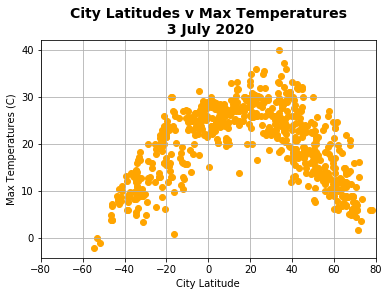

In [151]:
#Build a scatter plot for Latitude v Temp - Note Celsius is used
plt.scatter(clean_city_data["lat"], clean_city_data["max_temp"], facecolors="orange", marker="o")

#Incorporate other graph properties
plt.title("City Latitudes v Max Temperatures\n 3 July 2020", fontsize=14, fontweight="bold")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperatures (C)")
plt.xlim(-80,80)
plt.grid()
plt.savefig("../Images/lat_temp.png")
plt.show

ANALYSIS / COMMENT

As it is a northern hemisphere summer, temperatures are skewed to the northern hemispere, but generally the closer to the equator you are, the warmer you will be.

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

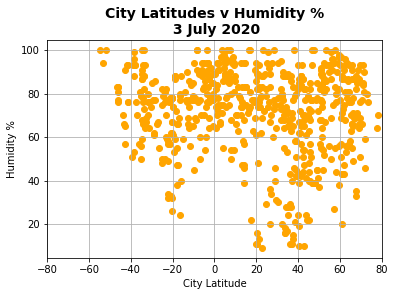

In [152]:
#Build a scatter plot for Latitude v Humidity
plt.scatter(clean_city_data["lat"], clean_city_data["humidity"], facecolors="orange", marker="o")

#Incorporate other graph properties
plt.title("City Latitudes v Humidity %\n 3 July 2020", fontsize=14, fontweight="bold")
plt.xlabel("City Latitude")
plt.ylabel("Humidity %")
plt.xlim(-80,80)
plt.grid()
plt.savefig("../Images/lat_humidity.png")
plt.show

ANALYSIS / COMMENT

There is not too many noticable trends, except that the closer to the equator you are the less likely you are to have humidity below about 50% and as it is northern hemisphere, there can be less humidity in certain places outside 20 degrees.

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

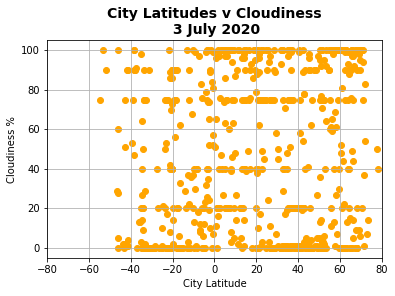

In [153]:
#Build a scatter plot for Latitude v Cloudiness %
plt.scatter(clean_city_data["lat"], clean_city_data["cloud"], facecolors="orange", marker="o")

#Incorporate other graph properties
plt.title("City Latitudes v Cloudiness\n 3 July 2020", fontsize=14, fontweight="bold")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness %")
plt.xlim(-80,80)
plt.grid()
plt.savefig("../Images/lat_cloudiness.png")
plt.show

ANALYSIS / COMMENT

Not much correlation between cloudiness and city latitudes.

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

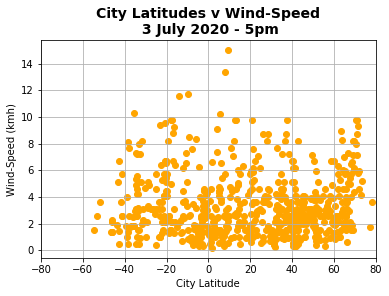

In [154]:
#Build a scatter plot for Latitude v Current Wind-Speed
plt.scatter(clean_city_data["lat"], clean_city_data["wind_speed"], facecolors="orange", marker="o")

#Incorporate other graph properties
plt.title("City Latitudes v Wind-Speed\n 3 July 2020 - 5pm", fontsize=14, fontweight="bold")
plt.xlabel("City Latitude")
plt.ylabel("Wind-Speed (kmh)")
plt.xlim(-80,80)
plt.grid()
plt.savefig("../Images/lat_windspeed.png")
plt.show

ANALYSIS / COMMENT

Not much correlation between wind speed and city latitudes.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [75]:
#Create a Northern Hesisphere DataFrame
clean_northern = clean_city_data.loc[clean_city_data["lat"] >= 0]

In [76]:
clean_northern.head(20)

,City_name,lat,long,max_temp,humidity,cloud,wind_speed,country
0,bara,10.37,10.73,26.61,70,14,4.76,NG
1,boa vista,2.82,-60.67,29.00,66,20,2.10,BR
2,albany,42.60,-73.97,26.11,65,78,2.24,US
5,yumen,40.28,97.20,24.02,19,99,2.98,CN
7,jamestown,42.10,-79.24,26.00,54,1,4.10,US
9,kangaatsiaq,68.31,-53.46,5.36,85,0,6.45,GL
10,xiaoweizhai,26.19,107.51,22.48,92,94,0.67,CN
11,kutum,14.20,24.67,25.00,57,96,6.01,SD
12,casper,42.87,-106.31,31.67,10,1,8.20,US
14,saskylakh,71.92,114.08,13.06,59,54,5.93,RU


In [77]:
#Calculate the correlation coefficient for the maximum temp in celsius
round(st.pearsonr(clean_northern["lat"], clean_northern["max_temp"])[0], 2)

-0.71

In [81]:
#Calculate the linear regression for the maximum temp in celsius
temp_slope_nth, temp_int_nth, temp_r_nth, temp_p_nth, temp_std_err_nth = stats.linregress(clean_northern["lat"], clean_northern["max_temp"])

In [82]:
#Equation of the line to calculate the linear regression maximum temp in celsius
temp_fit_nth = temp_slope_nth * clean_northern["lat"] + temp_int_nth

The r-squared is: 0.4975765353621274


<function matplotlib.pyplot.show(*args, **kw)>

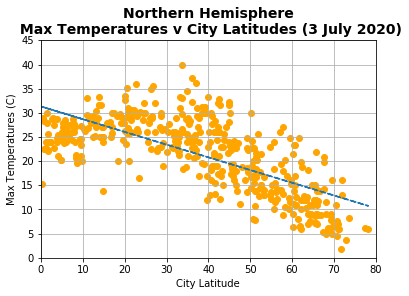

In [156]:
#Build a scatter plot for Latitude v Temp - Note Celsius is used
plt.scatter(clean_northern["lat"], clean_northern["max_temp"], facecolors="orange", marker="o")
plt.plot(clean_northern["lat"], temp_fit_nth, "--")

#Incorporate other graph properties
plt.title("Northern Hemisphere\n Max Temperatures v City Latitudes (3 July 2020)", fontsize=14, fontweight="bold")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperatures (C)")
plt.xlim(0,80)
plt.ylim(0,45)
plt.grid()
print(f"The r-squared is: {temp_r_nth**2}")
plt.savefig("../Images/Nthern_temp.png")
plt.show


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [74]:
#Create a Southern Hesisphere DataFrame
clean_southern = clean_city_data.loc[clean_city_data["lat"] <= 0]

In [88]:
clean_southern.head(5)

,City_name,lat,long,max_temp,humidity,cloud,wind_speed,country
3,hobart,-42.88,147.33,8.33,65,75,6.70,AU
4,rikitea,-23.12,-134.97,21.42,70,0,9.43,PF
6,tuatapere,-46.13,167.68,3.89,83,60,1.34,NZ
8,bundaberg,-24.85,152.35,19.00,82,1,3.10,AU
13,alice springs,-23.70,133.88,13.00,50,50,3.60,AU


In [89]:
#Calculate the correlation coefficient for the maximum temp in celsius
round(st.pearsonr(clean_southern["lat"], clean_southern["max_temp"])[0], 2)

0.81

In [90]:
#Calculate the linear regression for the maximum temp in celsius
temp_slope_sth, temp_int_sth, temp_r_sth, temp_p_sth, temp_std_err_sth = stats.linregress(clean_southern["lat"], clean_southern["max_temp"])

In [91]:
#Equation of the line to calculate the linear regression maximum temp in celsius
temp_fit_sth = temp_slope_sth * clean_southern["lat"] + temp_int_sth

The r-squared is: 0.6505348648875644


<function matplotlib.pyplot.show(*args, **kw)>

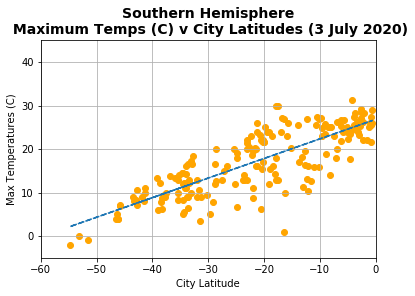

In [157]:
#Build a scatter plot for Temerature v Latitude (Southern)
plt.scatter(clean_southern["lat"], clean_southern["max_temp"], facecolors="orange", marker="o")
plt.plot(clean_southern["lat"], temp_fit_sth, "--")

#Incorporate other graph properties
plt.title("Southern Hemisphere\n Maximum Temps (C) v City Latitudes (3 July 2020)", fontsize=14, fontweight="bold")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperatures (C)")
plt.xlim(-60,0)
plt.ylim(-5,45)
plt.grid()
print(f"The r-squared is: {temp_r_sth**2}")
plt.savefig("../Images/Sthern_maxtemp.png")
plt.show

ANALYSIS / COMMENT - MAX TEMPERATURES V LATITUDES

Being a nortern hemisphere summer, temperatures are hotter, particularly between the 20 - 50 degrees latitude.  As expected with both charts given the linear regression lines, the further away from the equator you are the colder it gets.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [149]:
#Calculate the correlation coefficient for the % humidity
round(st.pearsonr(clean_northern["lat"], clean_northern["humidity"])[0], 2)

-0.08

In [96]:
#Calculate the linear regression for the % humidity
hum_slope_nth, hum_int_nth, hum_r_nth, hum_p_nth, hum_std_err_nth = stats.linregress(clean_northern["lat"], clean_northern["humidity"])

In [97]:
#Equation of the line to calculate the linear regression maximum temp in celsius
hum_fit_nth = hum_slope_nth * clean_northern["lat"] + hum_int_nth

The r-squared is: 0.006858735553210344


<function matplotlib.pyplot.show(*args, **kw)>

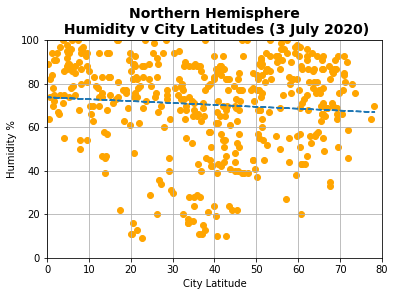

In [158]:
#Build a scatter plot for Humidity v Latitude
plt.scatter(clean_northern["lat"], clean_northern["humidity"], facecolors="orange", marker="o")
plt.plot(clean_northern["lat"], hum_fit_nth, "--")

#Incorporate other graph properties
plt.title("Northern Hemisphere\n Humidity v City Latitudes (3 July 2020)", fontsize=14, fontweight="bold")
plt.xlabel("City Latitude")
plt.ylabel("Humidity %")
plt.xlim(0,80)
plt.ylim(0,100)
plt.grid()
print(f"The r-squared is: {hum_r_nth**2}")
plt.savefig("../Images/Nthern_humidity.png")
plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [105]:
#Calculate the correlation coefficient for the % humidity
round(st.pearsonr(clean_southern["lat"], clean_southern["humidity"])[0], 2)

-0.01

In [106]:
#Calculate the linear regression for the % humidity
hum_slope_sth, hum_int_sth, hum_r_sth, hum_p_sth, hum_std_err_sth = stats.linregress(clean_southern["lat"], clean_southern["humidity"])

In [107]:
#Equation of the line to calculate the linear regression maximum temp in celsius
hum_fit_sth = hum_slope_sth * clean_southern["lat"] + hum_int_sth

The r-squared is: 0.0001149934016578383


<function matplotlib.pyplot.show(*args, **kw)>

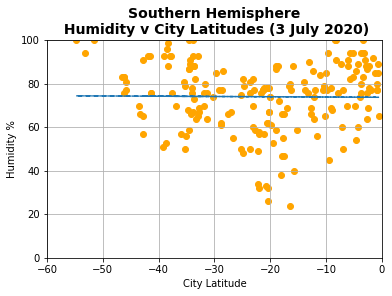

In [159]:
#Build a scatter plot for Humidity v Latitude
plt.scatter(clean_southern["lat"], clean_southern["humidity"], facecolors="orange", marker="o")
plt.plot(clean_southern["lat"], hum_fit_sth, "--")

#Incorporate other graph properties
plt.title("Southern Hemisphere\n Humidity v City Latitudes (3 July 2020)", fontsize=14, fontweight="bold")
plt.xlabel("City Latitude")
plt.ylabel("Humidity %")
plt.xlim(-60,0)
plt.ylim(0,100)
plt.grid()
print(f"The r-squared is: {hum_r_sth**2}")
plt.savefig("../Images/Southern_humidity.png")
plt.show

ANALYSIS / COMMENT

The linear regressions show that there is minimal correlation between humidity and city latitudes.  What would be interesting would be to see if the same outcomes are arrived at during the southern hemisphere summer.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [109]:
#Calculate the correlation coefficient for the Cloudiness %
round(st.pearsonr(clean_northern["lat"], clean_northern["cloud"])[0], 2)

-0.04

In [110]:
#Calculate the linear regression for the Cloudiness %
cloud_slope_nth, cloud_int_nth, cloud_r_nth, cloud_p_nth, cloud_std_err_nth = stats.linregress(clean_northern["lat"], clean_northern["cloud"])

In [111]:
#Equation of the line to calculate the linear regression Cloudiness %
cloud_fit_nth = cloud_slope_nth * clean_northern["lat"] + cloud_int_nth

The r-squared is: 0.0017474475797452011


<function matplotlib.pyplot.show(*args, **kw)>

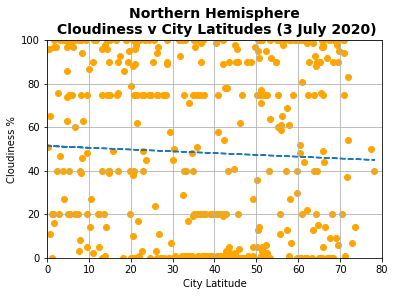

In [160]:
#Build a scatter plot for Cloudiness % v Latitude
plt.scatter(clean_northern["lat"], clean_northern["cloud"], facecolors="orange", marker="o")
plt.plot(clean_northern["lat"], cloud_fit_nth, "--")

#Incorporate other graph properties
plt.title("Northern Hemisphere\n Cloudiness v City Latitudes (3 July 2020)", fontsize=14, fontweight="bold")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness %")
plt.xlim(0,80)
plt.ylim(0,100)
plt.grid()
print(f"The r-squared is: {cloud_r_nth**2}")
plt.savefig("../Images/Northern_cloudiness.png")
plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [115]:
#Calculate the correlation coefficient for the Cloudiness %
round(st.pearsonr(clean_southern["lat"], clean_southern["cloud"])[0], 2)

0.04

In [116]:
#Calculate the linear regression for the Cloudiness %
cloud_slope_sth, cloud_int_sth, cloud_r_sth, cloud_p_sth, cloud_std_err_sth = stats.linregress(clean_southern["lat"], clean_southern["cloud"])

In [117]:
#Equation of the line to calculate the linear regression Cloudiness %
cloud_fit_sth = cloud_slope_sth * clean_southern["lat"] + cloud_int_sth

The r-squared is: 0.0019234519698420884


<function matplotlib.pyplot.show(*args, **kw)>

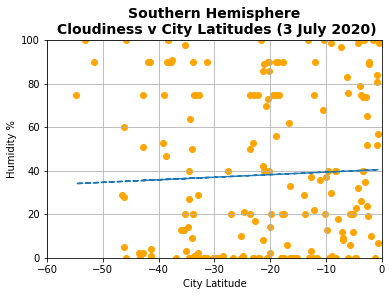

In [161]:
#Build a scatter plot for Cloudiness % v Latitude
plt.scatter(clean_southern["lat"], clean_southern["cloud"], facecolors="orange", marker="o")
plt.plot(clean_southern["lat"], cloud_fit_sth, "--")

#Incorporate other graph properties
plt.title("Southern Hemisphere\n Cloudiness v City Latitudes (3 July 2020)", fontsize=14, fontweight="bold")
plt.xlabel("City Latitude")
plt.ylabel("Humidity %")
plt.xlim(-60,0)
plt.ylim(0,100)
plt.grid()
print(f"The r-squared is: {cloud_r_sth**2}")
plt.savefig("../Images/Southern_cloudiness.png")
plt.show

ANALYSIS / COMMENT

Like the humidity, the linear regressions show that there is very small correlation between cloudiness and city latitudes, although slightly more clouds the closer to the equator you get.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [119]:
#Calculate the correlation coefficient for the wind speed
round(st.pearsonr(clean_northern["lat"], clean_northern["wind_speed"])[0], 2)

0.07

In [120]:
#Calculate the linear regression for the wind speed
wind_slope_nth, wind_int_nth, wind_r_nth, wind_p_nth, wind_std_err_nth = stats.linregress(clean_northern["lat"], clean_northern["wind_speed"])

In [121]:
#Equation of the line to calculate the linear regression wind speed
wind_fit_nth = wind_slope_nth * clean_northern["lat"] + wind_int_nth

The r-squared is: 0.004853545162575334


<function matplotlib.pyplot.show(*args, **kw)>

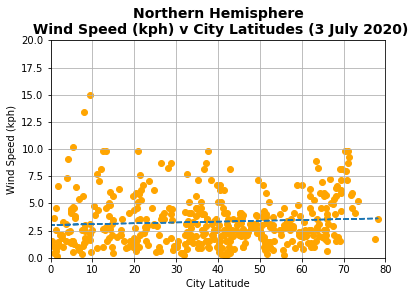

In [162]:
#Build a scatter plot for wind speed v Latitude
plt.scatter(clean_northern["lat"], clean_northern["wind_speed"], facecolors="orange", marker="o")
plt.plot(clean_northern["lat"], wind_fit_nth, "--")

#Incorporate other graph properties
plt.title("Northern Hemisphere\n Wind Speed (kph) v City Latitudes (3 July 2020)", fontsize=14, fontweight="bold")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (kph)")
plt.xlim(0,80)
plt.ylim(0,20)
plt.grid()
print(f"The r-squared is: {wind_r_nth**2}")
plt.savefig("../Images/Northern_WindSpeed.png")
plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [132]:
#Calculate the correlation coefficient for the wind speed
round(st.pearsonr(clean_southern["lat"], clean_southern["wind_speed"])[0], 2)

-0.03

In [133]:
#Calculate the linear regression for the wind speed
wind_slope_sth, wind_int_sth, wind_r_sth, wind_p_sth, wind_std_err_sth = stats.linregress(clean_southern["lat"], clean_southern["wind_speed"])

In [134]:
#Equation of the line to calculate the linear regression wind speed
wind_fit_sth = wind_slope_sth * clean_southern["lat"] + wind_int_sth

The r-squared is: 0.004853545162575334


<function matplotlib.pyplot.show(*args, **kw)>

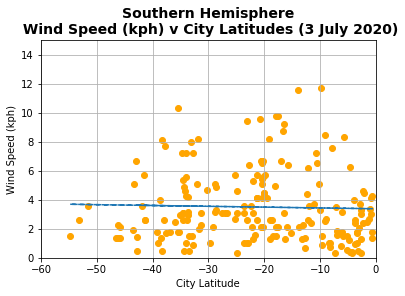

In [163]:
#Build a scatter plot for wind speed v Latitude
plt.scatter(clean_southern["lat"], clean_southern["wind_speed"], facecolors="orange", marker="o")
plt.plot(clean_southern["lat"], wind_fit_sth, "--")

#Incorporate other graph properties
plt.title("Southern Hemisphere\n Wind Speed (kph) v City Latitudes (3 July 2020)", fontsize=14, fontweight="bold")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (kph)")
plt.xlim(-60,0)
plt.ylim(0,15)
plt.grid()
print(f"The r-squared is: {wind_r_nth**2}")
plt.savefig("../Images/Southern_WindSpeed.png")
plt.show

ANALYSIS / COMMENT

Notwithstanding some outliers, there is a very small likelihood that it may be slightly windier the further away from the equator you are.